## Homework 01: due 2022/03/14 13:10

### - SVM tutorial : https://www.kaggle.com/prashant111/svm-classifier-tutorial

### - After you go through the SVM tutorial, you should be able to work on this assignment.

### - Please answer the following questions and work directly on this jupyter notebook.

### - Make sure the code can be run and show the result and figures properly.

### - Please write down your observation with markdown in this notebook briefly.



In [1]:
# Import necessary modules
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.datasets import make_blobs, make_circles, load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC

In [2]:
# Plotting function (you can modify this block change the plot)
def plot_svc_decision_function(model, ax=None, mode='train'):
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    X, Y = np.meshgrid(x, y)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    if mode == 'train':
        ax.contour(X, Y, P, colors='k',
                   levels=[-1, 0, 1], alpha=0.5,
                   linestyles=['--', '-', '--'])
    else:
        ax.contour(X, Y, P, colors='k',
                   levels=[0], alpha=0.5,
                   linestyles=['-'])
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

### 1. Kernel function and hyper paramters of support vector machine. (30%)
#### Please make the scatter plots with data, and visualize the decision boundary and positive and negative hyperplanes on the following questions.

##### Here is the example of the figure:
![1.png](https://github.com/tingyan08/Deep-Learning-and-Computer-Vision/blob/main/HW1/img/1.png?raw=true)

##### 1-1. Please use the __**svc**__ function in scikit learn module to compare the impact of the kernel function on the given two data below. Try at least ***linear, poly & rbf*** kernel functions and set hyper parameters ***C, degree*** and ***gamma*** as default. (15%)

In [3]:
# Do not change the data
X, y = make_blobs(n_samples=200, centers=2,random_state=0, cluster_std=2)

In [4]:
# default of C=1.0; degree=3; gamma='scale'
#create the svm model 
model1 = SVC(kernel='linear') 
model1.fit(X, y)
#create rbf kernel model
model2 = SVC(kernel='rbf') 
model2.fit(X, y)
#create poly kernel model
model3 = SVC(kernel='poly') 
model3.fit(X, y);

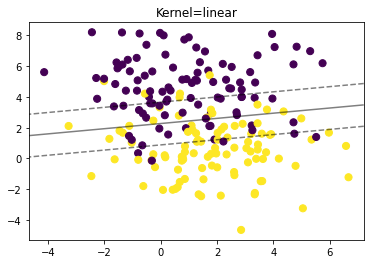

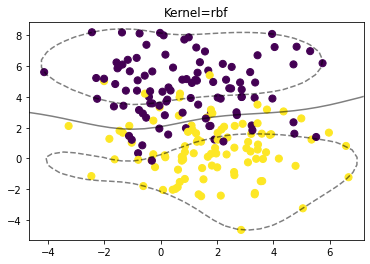

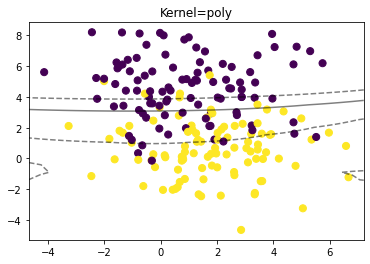

In [5]:
#Difference of kernel functions
#plot linear
plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=y, s=50);
plot_svc_decision_function(model1)
plt.title("Kernel=linear");

#plot poly
plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=y, s=50);
plot_svc_decision_function(model2)
plt.title("Kernel=rbf");

#plot rbf
plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=y, s=50);
plot_svc_decision_function(model3)
plt.title("Kernel=poly");

####   ANS of 1-1.1 :
根據相同資料以及default hyperparameters，用不同的kernel代表所顯示出來的boundary和hyperplane是根據不同公式得到，所以從三張圖中可以明顯看出差異。make blobs資料呈現linear的關係，因此若kernel用non-linear(i.e. 'rbf' or 'poly')，會導致overfit使得分類結果差，所以可想而知，若今天資料的分布比較複雜，很難經過linear進行分隔時，就需要納入non-linear的kernel進行資料的分類。

In [6]:
# Do not change the data
X, y = make_circles(n_samples=200, noise=0.2, factor=0.5, random_state=0)

In [7]:
# default of C=1.0; degree=3; gamma='scale'
#create the svm model 
model1 = SVC(kernel='linear') 
model1.fit(X, y)
#create rbf kernel model
model2 = SVC(kernel='rbf') 
model2.fit(X, y)
#create poly kernel model
model3 = SVC(kernel='poly') 
model3.fit(X, y);

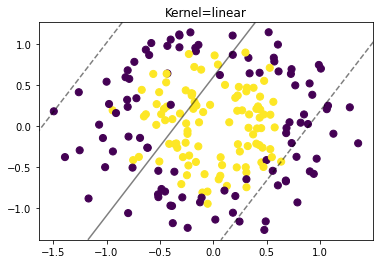

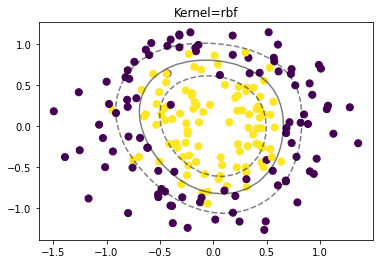

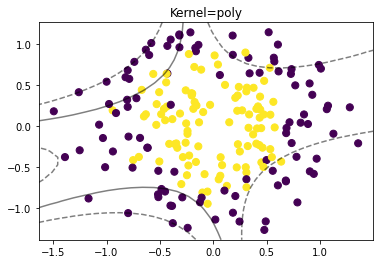

In [8]:
#Difference of kernel functions
#plot linear
plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=y, s=50);
plot_svc_decision_function(model1)
plt.title("Kernel=linear");

#plot poly
plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=y, s=50);
plot_svc_decision_function(model2)
plt.title("Kernel=rbf");

#plot rbf
plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=y, s=50);
plot_svc_decision_function(model3)
plt.title("Kernel=poly");

####   ANS 1-1.2 :
與上題來看，原始資料變成環狀的樣式，所獲得的結果也不同，其中使用rbf kernel的分類結果最好，因為可以看到資料的分布為non-linear關係，因此若kernel使用linear的話可想而知所分類出來的結果會比non-linear kernel來的差。

##### 1-2. Please use the __**svc**__ with ***linear*** kernel in scikit-learn module, and compare the impact of the hyper parameter ***C*** on the given data below. Try ***C=0.001 & 10000*** at least, and you can try more values of ***C*** to prove your observation. (5%)

In [9]:
# Do not change the data
X, y = make_blobs(n_samples=200, centers=2,random_state=0, cluster_std=1.2)

In [10]:
#create the svm model with different C
model1 = SVC(kernel='linear',C=0.01) 
model1.fit(X, y)
model2 = SVC(kernel='linear',C=0.001) 
model2.fit(X, y)
model3 = SVC(kernel='linear',C=10000) 
model3.fit(X, y)
model4 = SVC(kernel='linear',C=1) 
model4.fit(X, y);

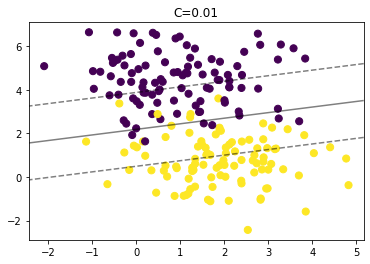

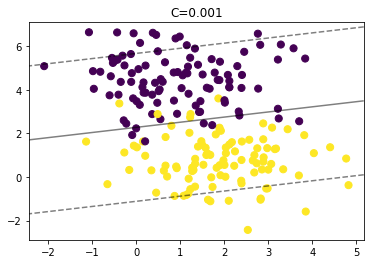

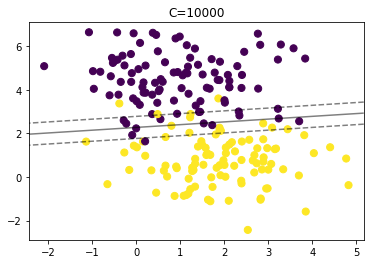

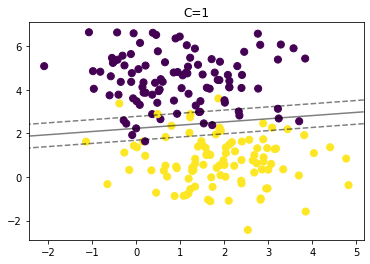

In [11]:
#Difference of C(penalty)
#plot C=1.0
plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=y, s=50);
plot_svc_decision_function(model1)
plt.title("C=0.01");

#plot C=0.001
plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=y, s=50);
plot_svc_decision_function(model2)
plt.title("C=0.001");

#plot C=10000
plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=y, s=50);
plot_svc_decision_function(model3)
plt.title("C=10000");

#plot C=1
plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=y, s=50);
plot_svc_decision_function(model4)
plt.title("C=1");

####   ANS 1-2 :
設定不同的Penalties(C parameter)，會使得margin改變，從上述的情況可以看到若C愈小，margin愈soft，表示可以讓愈多點包含在margin裡面；C愈大，margin愈hard，對於在margin裡面的點愈少，分類更嚴苛。另外可以看到當C=1或是C=10000，他們所獲得的margin會是一樣的，表示C到達某個特定值會呈現相同情況。

##### 1-3. Please use the __**svc**__ with ***poly*** kernel in scikit-learn module, and compare the impact of the hyper parameter ***degree*** on the given data below. Try ***degree=3 & 10*** at least, and you can try more values of ***degree*** to prove your observation.(5%)

In [12]:
# Do not change the data
X, y = make_blobs(n_samples=200, centers=2,random_state=0, cluster_std=1.2)

In [13]:
#create the svm models with same poly kernel but different degrees
model1 = SVC(kernel='poly', degree=3) 
model1.fit(X, y)

model2 = SVC(kernel='poly', degree=10) 
model2.fit(X, y)

model3 = SVC(kernel='poly', degree=5) 
model3.fit(X, y);

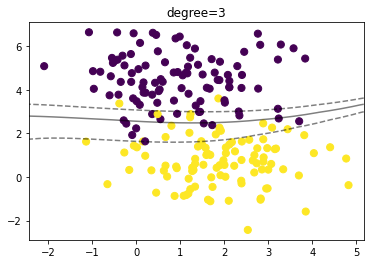

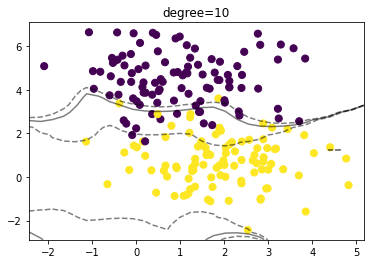

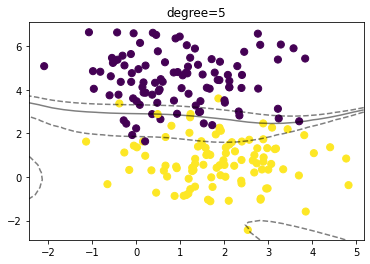

In [14]:
#Difference of degree
#plot degree=3
plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=y, s=50);
plot_svc_decision_function(model1)
plt.title("degree=3");

#plot degree=10
plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=y, s=50);
plot_svc_decision_function(model2)
plt.title("degree=10");

#plot degree=5
plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=y, s=50);
plot_svc_decision_function(model3)
plt.title("degree=5");

####   ANS 1-3 :
Degree愈高，表示poly的方程式次方愈高，所獲得的boundary愈複雜，但可以看到degree=10的時候，已經明顯overfit，因此在使用poly時，要注意有無overfit或是underfit的情況

##### 1-4. Please use the __**svc**__ with ***rbf*** kernel in scikit-learn module, and compare the impact of the hyper parameter ***gamma*** on the given data below. Try ***gamma=1 & 10*** at least, and you can try more values of ***gamma*** to prove your observation. (5%)

In [15]:
# Do not change the data
X, y = make_circles(n_samples=200, noise=0.3, factor=0.3, random_state=0)

In [16]:
#create the svm models with same rbf kernel but different gammas
model1 = SVC(kernel='rbf', gamma=1) 
model1.fit(X, y)

model2 = SVC(kernel='rbf', gamma=10) 
model2.fit(X, y)

model3 = SVC(kernel='rbf', gamma=5) 
model3.fit(X, y);

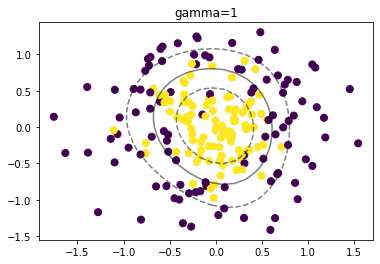

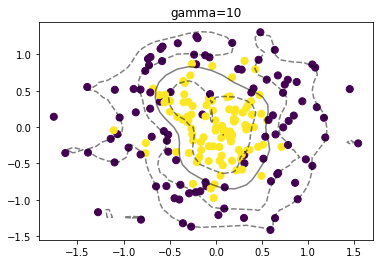

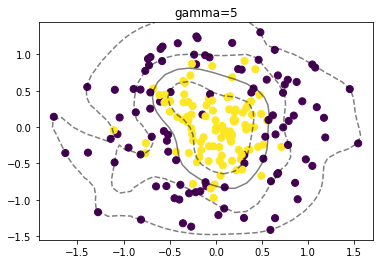

In [17]:
#Difference of gamma
#plot gamma=1
plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=y, s=50);
plot_svc_decision_function(model1)
plt.title("gamma=1");

#plot gamma=10
plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=y, s=50);
plot_svc_decision_function(model2)
plt.title("gamma=10");

#plot gamma=5
plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=y, s=50);
plot_svc_decision_function(model3)
plt.title("gamma=5");

####   ANS 1-4 :
Gamma代表每個point的影響程度，若影響程度(Gamma)設定愈大，所得到的boundary跟hyperplane愈容易受鄰近的點影響，也就是說每個點的重要性都會相同，hyperplane變不規則。

### 2. Model evaluation and hyper parameters searching. (30%)
#### Please make the scatter plots of data, visualize the decision boundary and positive and negative hyperplanes and calculate the accuracy score on training data and testing data on the following questions.

##### Here is the example of the figure:
![2.png](https://github.com/tingyan08/Deep-Learning-and-Computer-Vision/blob/main/HW1/img/2.png?raw=true)

##### 2-1 Use the ***training ratio 0.8 and 0.2*** to split the given data, and use the ***rbf*** kernel with ***gamma = "auto"***. Please discuss the impact of training ratio. (Split the data with random state 0) (10%)

In [18]:
# Do not change the data
X, y = make_blobs(n_samples=200, centers=2,random_state=0, cluster_std=1.5)

Model accuracy score with default hyperparameters: 0.8750
Training score: 0.9062
Test score: 0.8750


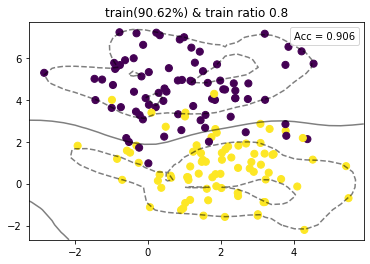

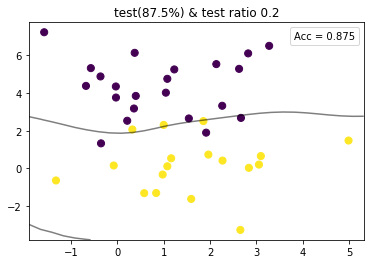

In [19]:
from sklearn.metrics import accuracy_score

#Split the data
test_size = 0.2  #training ratio 0.8
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=test_size, random_state=0)
model1 = SVC(kernel='rbf', gamma='auto')
model1.fit(X_train, Y_train) #Train the model using the training sets
y_pred = model1.predict(X_test)
print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(Y_test, y_pred)))
print('Training score: {:.4f}'.format(model1.score(X_train, Y_train)))
print('Test score: {:.4f}'.format(model1.score(X_test, Y_test)))

#plot train data
plt.figure()
plt.scatter(X_train[:, 0], X_train[:, 1], c=Y_train, s=50, label=f"Acc = {model1.score(X_train, Y_train):.3f}")
plt.legend(handlelength=0, handletextpad=0, markerscale=0, fancybox=True)
plot_svc_decision_function(model1,ax=None, mode='train')
plt.title("train(90.62%) & train ratio 0.8");

#plot test data
plt.figure()
plt.scatter(X_test[:, 0], X_test[:, 1], c=Y_test, s=50,label=f"Acc = {model1.score(X_test, Y_test):.3f}")
plt.legend(handlelength=0, handletextpad=0, markerscale=0, fancybox=True)
plot_svc_decision_function(model1,ax=None, mode='test')
plt.title("test(87.5%) & test ratio 0.2");

Model accuracy score with default hyperparameters: 0.8063
Training score: 0.9500
Test score: 0.8063


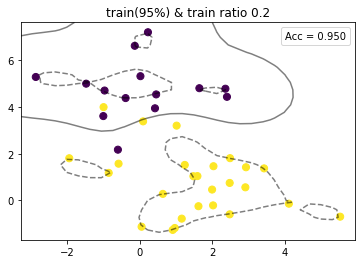

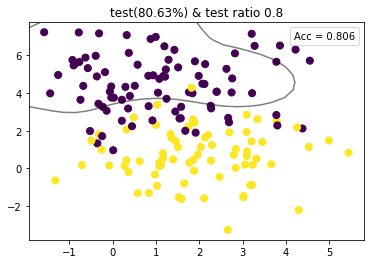

In [20]:
from sklearn.metrics import accuracy_score

#Split the data
test_size = 0.8  #training ratio 0.2
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=test_size, random_state=0)
model1 = SVC(kernel='rbf', gamma='auto')
model1.fit(X_train, Y_train) #Train the model using the training sets
y_pred = model1.predict(X_test)
print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(Y_test, y_pred)))
print('Training score: {:.4f}'.format(model1.score(X_train, Y_train)))
print('Test score: {:.4f}'.format(model1.score(X_test, Y_test)))

#plot train data
plt.figure()
plt.scatter(X_train[:, 0], X_train[:, 1], c=Y_train, s=50, label=f"Acc = {model1.score(X_train, Y_train):.3f}")
plt.legend(handlelength=0, handletextpad=0, markerscale=0, fancybox=True)
plot_svc_decision_function(model1)
plt.title("train(95%) & train ratio 0.2");

#plot test data
plt.figure()
plt.scatter(X_test[:, 0], X_test[:, 1], c=Y_test, s=50, label=f"Acc = {model1.score(X_test, Y_test):.3f}")
plt.legend(handlelength=0, handletextpad=0, markerscale=0, fancybox=True)
plot_svc_decision_function(model1, ax=None, mode='test')
plt.title("test(80.63%) & test ratio 0.8");


#### ANS 2-1 :
根據不同的training ratio，兩者之間的差異可以從每個模型的train及test的accuracy score得知。train data本身比test data的資料還多的話(training ratio=0.8)，可以確定其在訓練模型，看過的資料比training ratio=0.2的模型還多了0.6，所訓練出來的模型比較完善，再從test score可以驗證，看過比較多資料的模型其test score為87.5%、比較少資料為80.63%，因此我們會希望train及test score彼此之間的差異不要太大，會造成模型overfit。

##### 2-2 Split the given data with ***training ratio 0.8***, and use the ***rbf*** kernel with different values of ***gamma = 1 and 10***. Please discuss the impact of gamma. (Split the data with random state 0) (10%)

In [21]:
# Do not change the data
X, y = make_blobs(n_samples=200, centers=2,random_state=0, cluster_std=1.5)

Model accuracy score with default hyperparameters: 0.8750
Training score: 0.9187
Test score: 0.8750


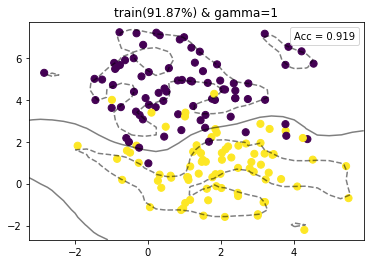

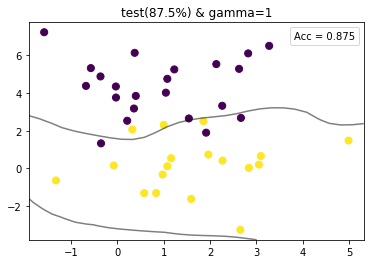

In [22]:
#Split the data for gamma=1
test_size = 0.2
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=test_size, random_state=0) 
model1 = SVC(kernel='rbf', gamma=1)
model1.fit(X_train, Y_train)
y_pred = model1.predict(X_test)
print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(Y_test, y_pred)))
print('Training score: {:.4f}'.format(model1.score(X_train, Y_train)))
print('Test score: {:.4f}'.format(model1.score(X_test, Y_test)))

#plot train data
plt.figure()
plt.scatter(X_train[:, 0], X_train[:, 1], c=Y_train, s=50, label=f"Acc = {model1.score(X_train, Y_train):.3f}")
plt.legend(handlelength=0, handletextpad=0, markerscale=0, fancybox=True)
plot_svc_decision_function(model1)
plt.title("train(91.87%) & gamma=1");

#plot test data
plt.figure()
plt.scatter(X_test[:, 0], X_test[:, 1], c=Y_test, s=50, label=f"Acc = {model1.score(X_test, Y_test):.3f}")
plt.legend(handlelength=0, handletextpad=0, markerscale=0, fancybox=True)
plot_svc_decision_function(model1, ax=None, mode='test')
plt.title("test(87.5%) & gamma=1");

Model accuracy score with default hyperparameters: 0.7750
Training score: 0.9812
Test score: 0.7750


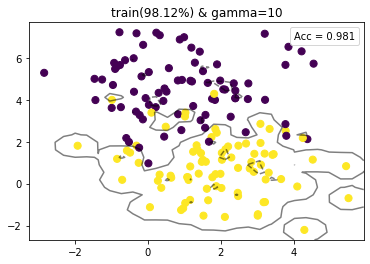

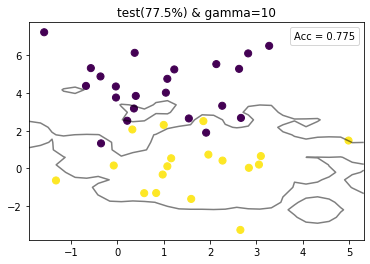

In [23]:
#Split the data for gamma=10
test_size = 0.2
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=test_size, random_state=0) 
model2 = SVC(kernel='rbf', gamma=10)
model2.fit(X_train, Y_train)
y_pred = model2.predict(X_test)
print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(Y_test, y_pred)))
print('Training score: {:.4f}'.format(model2.score(X_train, Y_train)))
print('Test score: {:.4f}'.format(model2.score(X_test, Y_test)))

#plot train data
plt.figure()
plt.scatter(X_train[:, 0], X_train[:, 1], c=Y_train, s=50, label=f"Acc = {model2.score(X_train, Y_train):.3f}")
plt.legend(handlelength=0, handletextpad=0, markerscale=0, fancybox=True)
plot_svc_decision_function(model2)
plt.title("train(98.12%) & gamma=10");

#plot test data
plt.figure()
plt.scatter(X_test[:, 0], X_test[:, 1], c=Y_test, s=50, label=f"Acc = {model2.score(X_test, Y_test):.3f}")
plt.legend(handlelength=0, handletextpad=0, markerscale=0, fancybox=True)
plot_svc_decision_function(model2, ax=None, mode='test')
plt.title("test(77.5%) & gamma=10");

#### ANS 2-2 :
可看到gamma=10會產生model overfitting，要降低gamma的數值使得模型的複雜度也可以跟著降低，才不會讓train及test model之間的accuracy差異太大。

##### 2-3 Tune the parameter by the given data with ***GridSearchCV*** function and do the 2 fold cross validation. Please try the parameters below to find the best parameter and plot the result and show the accuracy score. 
##### (You can find the details of ***GridSearchCV*** function at https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html?highlight=grid%20search#sklearn.model_selection.GridSearchCV) (10%)
| | 01 | 02 | 03 | 04 |
|:---:|:---:|:---:|:---:|:---:|
|***Kernel***| Linear | rbf | -| -|
|***C***| 0.1 | 1 | 10|100|
|***gamma***| 1 | 0.1 | 0.01|0.001|

In [24]:
# Do not change the data
X, y = make_blobs(n_samples=200, centers=2,random_state=0, cluster_std=1.5)

GridSearch best score : 0.9000


Parameters that give the best results : 

 {'C': 0.1, 'gamma': 1, 'kernel': 'linear'}


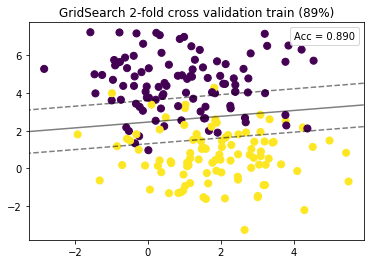

In [25]:
#create model
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

#create the grid search
parameters = {'kernel':('linear', 'rbf'), 'C':[0.1, 1, 10, 100], 'gamma':[1, 0.1, 0.01, 0.001]}
# define the evaluation procedure
cv = KFold(n_splits=2)
# define the grid search procedure
grid_search = GridSearchCV(SVC(), param_grid=parameters, n_jobs=-1,scoring = 'accuracy',cv=cv)
# execute the grid search
grid_result = grid_search.fit(X, y)

# summarize the best score and configuration
print('GridSearch best score : {:.4f}\n\n'.format(grid_result.best_score_))
print('Parameters that give the best results :','\n\n', (grid_search.best_params_))
final_model = grid_search.best_estimator_

#plot train data
plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, label=f"Acc = {final_model.score(X, y):.3f}");
plot_svc_decision_function(final_model)
plt.legend(handlelength=0, handletextpad=0, markerscale=0, fancybox=True)
plt.title("GridSearch 2-fold cross validation train (89%)");

Model accuracy score with best hyperparameters: 0.9000
GridSearch CV score on test set: 0.9000


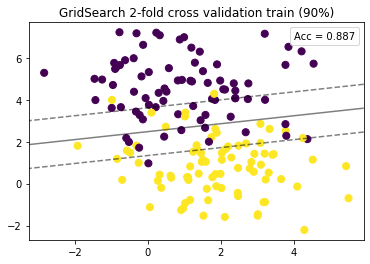

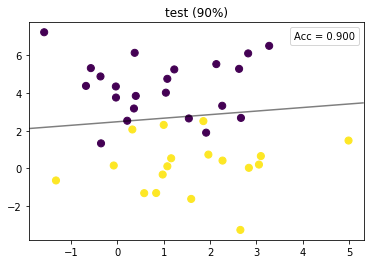

In [26]:
#using test data to evaluate model
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=0)
final_model.fit(X_train, Y_train)
final_predictions = final_model.predict(X_test)
print('Model accuracy score with best hyperparameters: {0:0.4f}'. format(accuracy_score(Y_test, final_predictions))) 
print('GridSearch CV score on test set: {0:0.4f}'.format(final_model.score(X_test, Y_test))) #the same

#plot train data
plt.figure()
plt.scatter(X_train[:, 0], X_train[:, 1], c=Y_train, s=50, label=f"Acc = {final_model.score(X_train, Y_train):.3f}");
plot_svc_decision_function(final_model)
plt.legend(handlelength=0, handletextpad=0, markerscale=0, fancybox=True)
plt.title("GridSearch 2-fold cross validation train (90%)");

#plot test data
plt.figure()
plt.scatter(X_test[:, 0], X_test[:, 1], c=Y_test, s=50, label=f"Acc = {final_model.score(X_test, Y_test):.3f}");
plt.legend(handlelength=0, handletextpad=0, markerscale=0, fancybox=True)
plot_svc_decision_function(final_model, ax=None, mode='test')
plt.title("test (90%)");

#### ANS 2-3 :
透過grid search，模型找到的最佳組合為{'C': 0.1, 'gamma': 1, 'kernel': 'linear'}，另外train及test所得出來的accuracy都相同。相對於前面沒有進行grid search 的模型，兩個模型之間的差異就差很多。

### 3. Fitting the SVM with the real data. (40%)
#### This question will fit the SVM with real raw data. Try the technique above to reach the highest score.

##### 3-1 Data preprocesssing : Please draw the boxplots of each features and draw another figure with boxplots of each feaures after applying the min max scaling . (10%)

##### Here is the example of figure:
![3.png](https://github.com/tingyan08/Deep-Learning-and-Computer-Vision/blob/main/HW1/img/3.png?raw=true)

In [27]:
# Do not change the data
data = load_breast_cancer()

In [28]:
import pandas as pd 
df = pd.DataFrame(data.data, columns = data.feature_names)
target = load_breast_cancer().target #y data
col_names = df.columns #the column names of the dataframe
print(df.shape)

(569, 30)


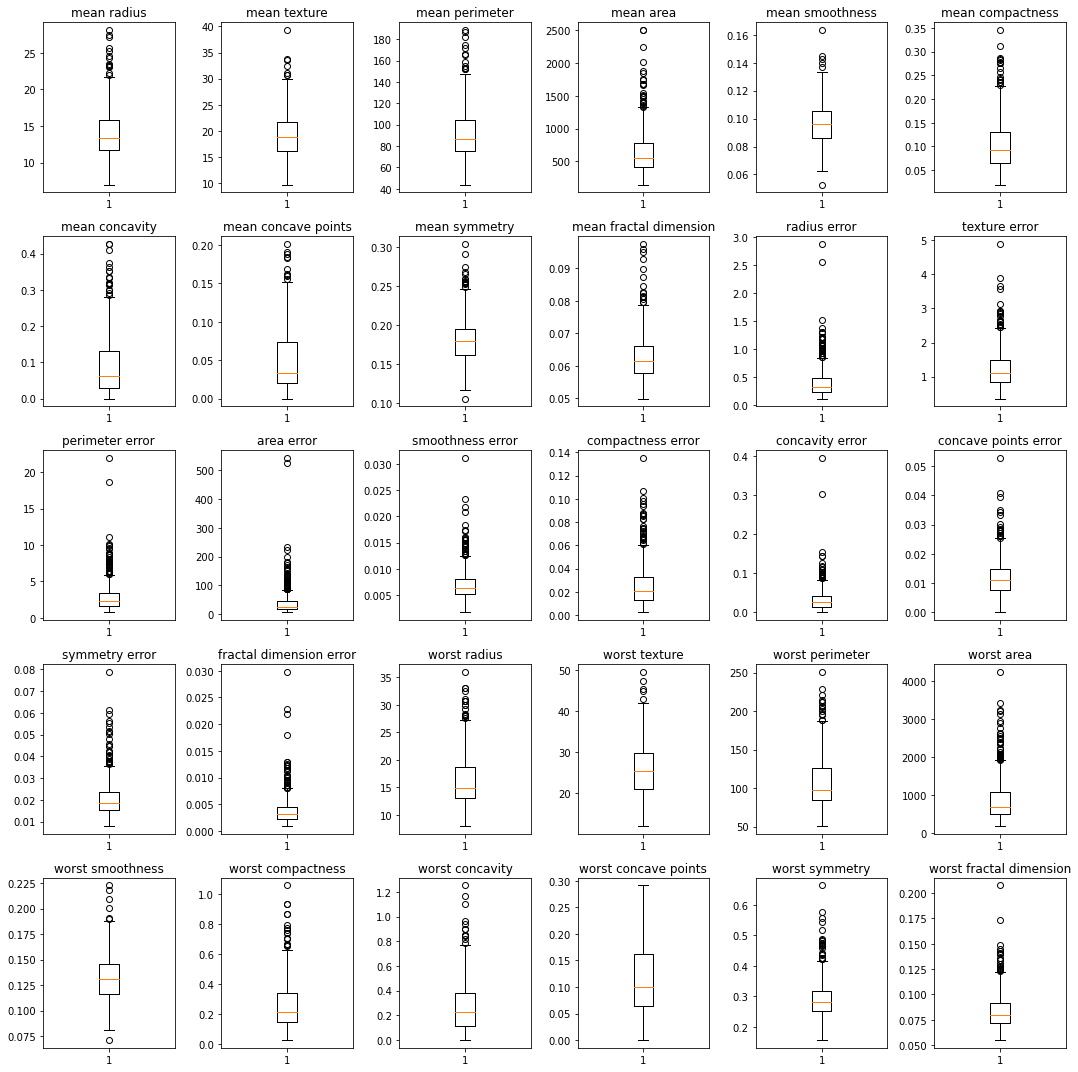

In [29]:
#plot the boxplot for original data
fig, axs = plt.subplots(5, 6, figsize=(15,15))
for i, ax in enumerate(axs.flat):
    ax.boxplot(df.iloc[:,i])
    ax.set_title(df.columns[i])
    
plt.tight_layout()

In [30]:
from sklearn.preprocessing import MinMaxScaler
#data for min max
scaler = MinMaxScaler()
scaler.fit(df)
df_minmax = pd.DataFrame(scaler.transform(df),columns = data.feature_names)
print(df_minmax.shape)
print(type(df_minmax))

(569, 30)
<class 'pandas.core.frame.DataFrame'>


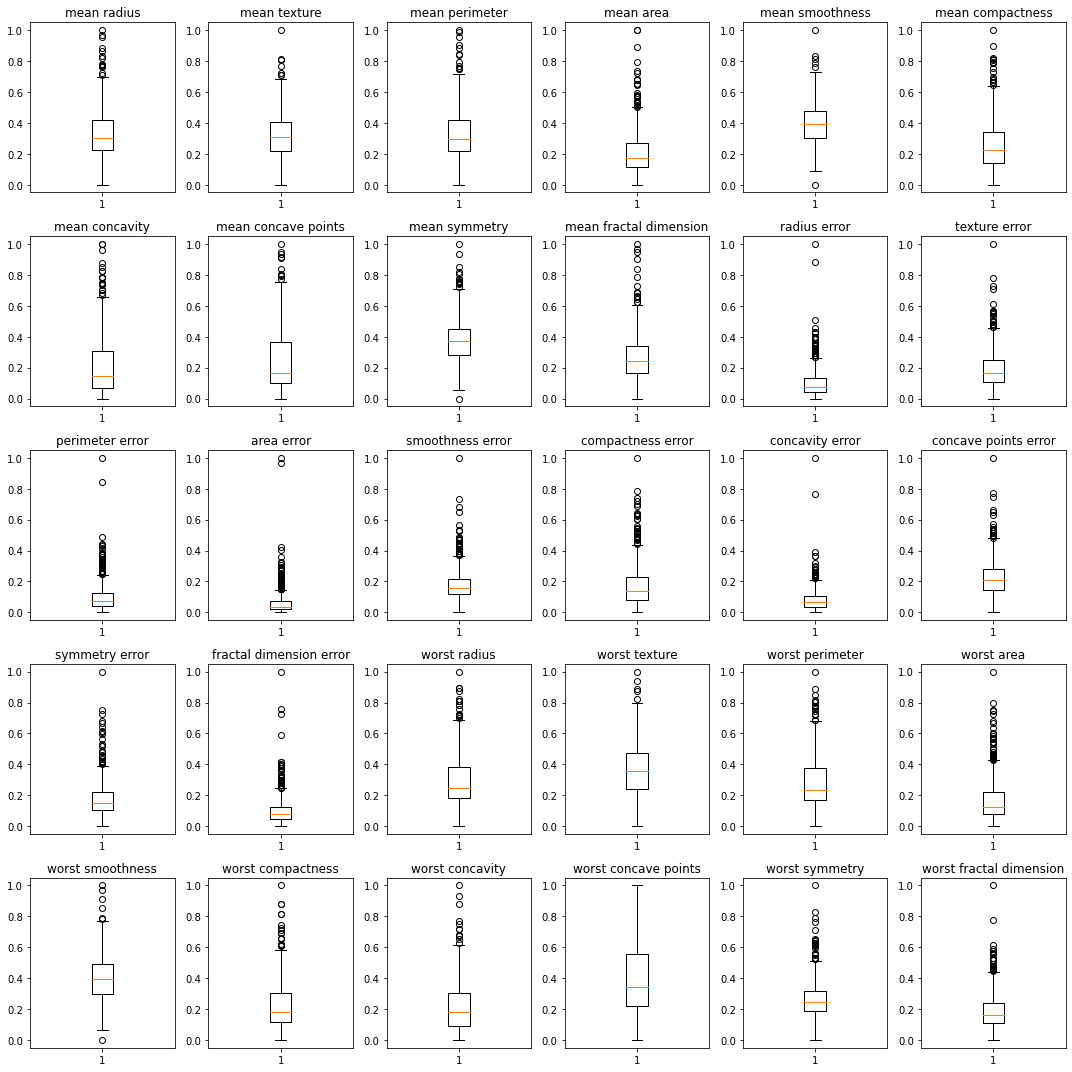

In [31]:
#plot the boxplot for minmax
fig, axs = plt.subplots(5, 6, figsize=(15,15))
for i, ax in enumerate(axs.flat):
    ax.boxplot(df_minmax.iloc[:,i])
    ax.set_title(df_minmax.columns[i])
    
plt.tight_layout()

#### ANS 3-1 :
每個features在沒有經過scaling，就依照原始值形成boxplot，有的boxplot間距超過2000以上，有些比1來的更小。若經過scaling則可以看到每個features的間距都被壓在0和1以內。

##### 3-2  Please split the data with training ratio 0.8, and fit the SVM with your own hyper parameters (at least two sets of parameters). Also, draw the ROC curve and calculate the AUC score of the testing data to compare the performance of two models. (Note. The tutorial considers only one decision threshold, you should think about how to draw the ROC curve with different decision threshold) (20%)

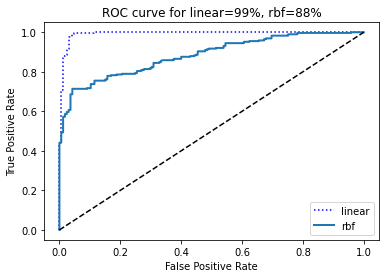

auc_score for linear model: 0.992
auc_score for rbf model: 0.884


In [32]:
#create model
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import roc_curve, roc_auc_score

#Split the data with training ratio 0.8
test_size = 0.2
X = df_minmax
Y = target
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=0) 
kfold = KFold(n_splits=10)

#model1
model1 = SVC(kernel='linear', C=1)
scoring = 'roc_auc'
results = cross_val_score(model1, X_train, Y_train, cv=kfold, scoring=scoring)
y_scores = cross_val_predict(model1, X_train, Y_train, cv=kfold, method='decision_function')

#define plot 
fpr, tpr, thresholds = roc_curve(Y_train, y_scores)
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1],[0, 1],'k--')
    [...]

#model2
model2 = SVC(kernel='rbf', gamma=40)
y_scores2 = cross_val_predict(model2, X_train, Y_train, cv=kfold, method='decision_function')

fpr_rbf, tpr_rbf, thresholds_rbf = roc_curve(Y_train, y_scores2)
plt.plot(fpr, tpr,"b:", label='linear')
plot_roc_curve(fpr_rbf, tpr_rbf, 'rbf')
plt.legend(loc='lower right')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC curve for linear=99%, rbf=88%")
plt.show()


#auc score
auc_score1 = roc_auc_score(Y_train, y_scores)
auc_score2 = roc_auc_score(Y_train, y_scores2)
print('auc_score for linear model: %.3f' % auc_score1)
print('auc_score for rbf model: %.3f' % auc_score2)


#### ANS 3-2 :
我使用的兩個模型，有個是linear kernel並且將C設為1，另一模型則是使用rbf kernel並把gamma調成40，為了想看overfitting的模型與不錯模型的AUC score及ROC curve差異，從圖中可以看到黑色虛線下是面積為0.5代表隨機分類的模型，表示兩個模型比隨機亂猜的模型還好，而相較下gamma=40的模型比沒有overfit的linear模型roc_auc來的低。

##### 3-3 Compare the models from question 3-2 and choose the best parameter and corresponding model to draw the cofusion matrix of training data and testing data, and calculate the accuracy, precision, recall and F1-score. (10%)

In [33]:
# return accuracy
def calculate_accuracy(matrix) -> tuple:  
    tp, fp, fn, tn = matrix.ravel()
    accuracy = (tp + tn) / (tp + fp + fn + tn)
    return accuracy

              precision    recall  f1-score   support

           0       0.99      0.95      0.97       165
           1       0.97      1.00      0.98       290

    accuracy                           0.98       455
   macro avg       0.98      0.97      0.98       455
weighted avg       0.98      0.98      0.98       455

accuracy: 0.980
f1_score: 0.985
recall_score: 0.997
precision_score: 0.973


Text(0.5, 1.0, 'Confusion Matrix of training data')

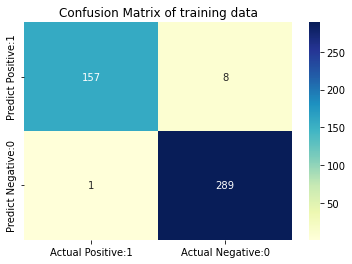

In [34]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns # for statistical data visualization


#for train data
model1.fit(X_train, Y_train)
predicted = model1.predict(X_train)
matrix = confusion_matrix(Y_train, predicted)
report = classification_report(Y_train, predicted)
print(report)

accuracy = calculate_accuracy(matrix)
print('accuracy: %.3f' % accuracy)
print('f1_score: %.3f' % f1_score(Y_train, predicted))
print('recall_score: %.3f' % recall_score(Y_train, predicted))
print('precision_score: %.3f' % precision_score(Y_train, predicted))


#plot
cm_matrix = pd.DataFrame(data=matrix, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])


sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.title("Confusion Matrix of training data")

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        47
           1       0.97      1.00      0.99        67

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

accuracy: 0.982
f1_score: 0.985
recall_score: 1.000
precision_score: 0.971


Text(0.5, 1.0, 'Confusion Matrix of testing data')

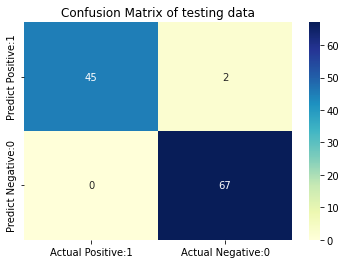

In [35]:
#for train data
model1.fit(X_test, Y_test)
predicted = model1.predict(X_test)
matrix = confusion_matrix(Y_test, predicted)
report = classification_report(Y_test, predicted)
print(report)

#calculate score
accuracy = calculate_accuracy(matrix)
print('accuracy: %.3f' % accuracy)
print('f1_score: %.3f' % f1_score(Y_test, predicted))
print('recall_score: %.3f' % recall_score(Y_test, predicted))
print('precision_score: %.3f' % precision_score(Y_test, predicted))


#plot
cm_matrix = pd.DataFrame(data=matrix, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])


sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.title("Confusion Matrix of testing data")

#### ANS 3-3 :
根據兩個模型比較後挑選RUC_AOC較高的模型，linear比rbf更適合這筆資料的分類。